# GaussianNB

В данном примере я расскжау о реализации ***Гауссовского наивного Байеса*** в библиотеке `sklearn`.

Но для начала немного формальностей. Подключим библиотеки:

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plot

from ipywidgets import interact
import ipywidgets as widgets

Подключим, собственно, класс *наивного Байеса*:

In [2]:
from sklearn.naive_bayes import GaussianNB

Для демонстрации возможностей библиотеки воспользуемся привычными для классификации ***ирисами Фишера***:

In [3]:
iris = datasets.load_iris()
print(iris.data[1:15])
print("...")

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]]
...


## API

Класс `GaussianNB` имеет конструктор с параметрами

`GaussianNB(priors=None, var_smoothing=1e-09)`, где

* `priors` – массив априорных вероятностей классов $𝑃(𝑦)$. Если указано, апприорные не корректируются в соответствии с данными;
* `var_smoothing` – (var-variance = дисперсия) часть наибольшей дисперсии всех признаков, добавляемая к отклонениям для стабильности расчета.

Экземпляр класса имеет ряд свойств (доступны после обучения):

* `class_prior_` – массив апостериорных вероятностей появления класса $𝑃(𝑦)$. В случае, если при создании priors не были указаны, вычисляется по формуле $𝑃(𝑦)=ℓ𝑦ℓ$.
* `class_count_` – массив количества объектов каждого класса
* `theta_` – матрица мат. ожидания
* `sigma_` – матрица дисперсии

### Основные методы

```
fit(X: array-like, shape (n_samples, n_features)
    y: array-like, shape (n_samples,)
    sample_weight: array-like, shape(n_samples,), optional(default=None)
```

`sample_weight` – вес каждого объекта, если веса имеются

Обучает наивного Байеса

```
partial_fit(X, y, classes=None, sample_weight=None)
```

Частичное обучение по кускам данных. Этот метод нужно вызывать несколько раз с разными данными. Создан для тех случаев, когда данные не влезают в оперативную память или приходят кусками. Данные лучше скармливать как можно большими порциями, у этого метода есть проблемы с производительностью и точностью.

```
predict(X: array-like, shape = [n_samples, n_features])

returns: C : array, shape = [n_samples]
```

Классифицирует `X`

```
predict_proba(X)
```

Кроме того, что классифицирует, еще и возвращает вероятности принадлежности объекта каждому классу. Пользоваться им не рекомендуют, причины я уже говорил ранее. Предположение о независимости признаков плохо сказывается на этой величине.

## Пример

In [5]:
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)

print("Апостерирорные вероятности =", gnb.class_prior_)
print("Мат ожидания =\n", gnb.theta_)
print("Дисперсии =\n", gnb.sigma_)

Апостерирорные вероятности = [0.33333333 0.33333333 0.33333333]
Мат ожидания =
 [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Дисперсии =
 [[0.121764 0.140816 0.029556 0.010884]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


Запустим алгоритм на всей выборке:

In [6]:
y_predict = gnb.predict(iris.data)

print("Количество неправильно распознанных ирисов из %d = %d"
       % (iris.data.shape[0],(iris.target != y_predict).sum()))

Количество неправильно распознанных ирисов из 150 = 6


Функция ниже получает на вход номера 2х признаков, которые нужно отразить на графике и классифицировать. *Ирисы Фишера* имеют размерность > 2, поэтому их не возможно отравить на плоскости – для этого отбираем признаки.

Звёздосчаки отмечены те объекты, которые были классифицированы неправильно.

Количество неправильно распознанных ирисов из 150 = 33


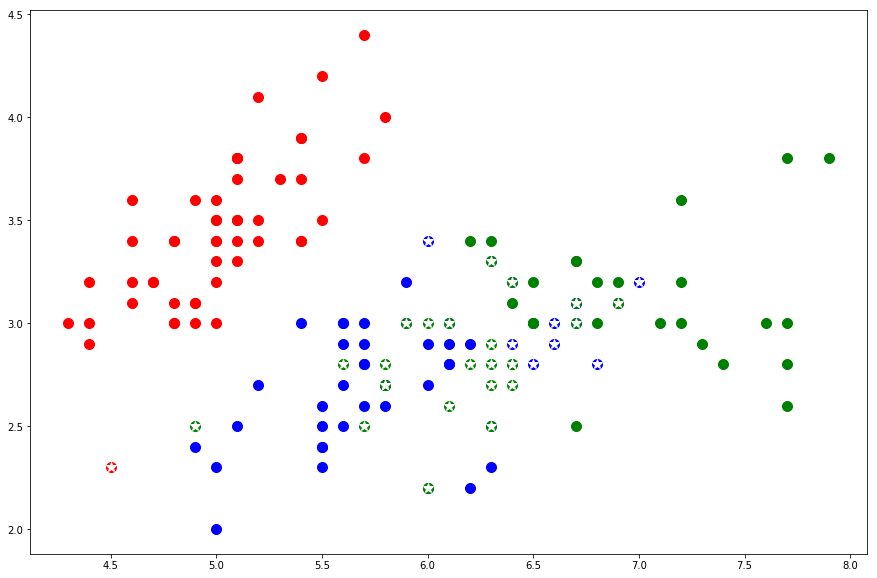

In [7]:
def show_2_features(feat1, feat2):
    data = iris.data[:,[feat1, feat2]]

    gnb2 = GaussianNB()
    gnb2.fit(data, iris.target)

    y_predict2 = gnb2.predict(data)

    print("Количество неправильно распознанных ирисов из %d = %d"
           % (data.shape[0],(iris.target != y_predict2).sum()))

    def get_by_y(y):
            return data[list(map(lambda t: t == y, iris.target))]

    plot.rcParams['figure.figsize'] = (15, 10)
    plot.figure()

    colors = ['r', 'b', 'g']
    for y in range(0, 3):
        data_y = get_by_y(y)
        plot.plot(data_y[:,0], data_y[:,1], 'o', color = colors[y], markersize=10)

    errors = data[iris.target != y_predict2]
    plot.plot(errors[:,0], errors[:,1], 'w*', markersize=10)

    plot.show()
    

show_2_features(0, 1)

Количество неправильно распознанных ирисов из 150 = 6


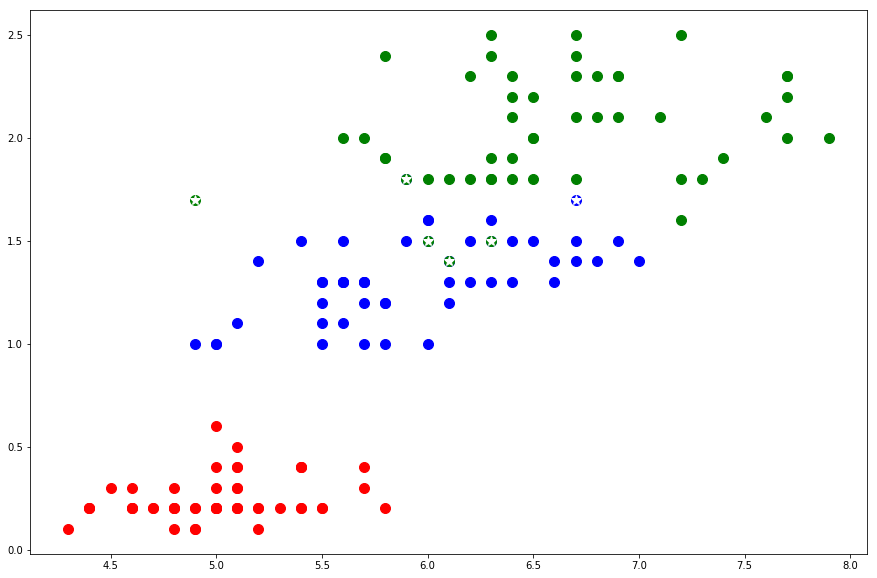

In [9]:
show_2_features(0, 3)

### Интерактив

Этот пример будет использует виджеты jupiter notebook, поэтому будет работать только при наличии сервера. Не работает на статичных страницах гитхаба.

Для работы с виджетами нужно поключить их с помощью

```
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

In [160]:
interact(show_2_features, 
                feat1 = widgets.IntSlider(min = 0, max = 3, value = 0),
                feat2 = widgets.IntSlider(min = 0, max = 3, value = 1),
               );

interactive(children=(IntSlider(value=0, description='feat1', max=3), IntSlider(value=1, description='feat2', …